**NOT USED ANYMORE (but can be reused later for further EDAs)**

In [8]:
import os
import json
from PIL import Image
from pathlib import Path
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_palette("gray")  # Grayscale for some journals


In [2]:
darwin_path = '/darwin/digital-production'
datasets = os.listdir(darwin_path)
datasets = ['haldennord09',
            'haldensued10',
            'bildacher',
            'haldensued08',
            'haldennord10',
            'lightly']


0

In [3]:

def get_pixel_count_simple(image_path):
    """Return just the total pixel count of an image."""
    with Image.open(image_path) as img:
        width, height = img.size
        return width * height
    

def get_dataset_dimensions(dataset_path):
    """
    Extract all lengths, widths, and areas from all annotation files in a dataset.
    
    Args:
        dataset_path (str): Path to the dataset directory containing JSON annotation files
        
    Returns:
        dict: Dictionary containing lists of heights, widths, and areas
    """
    heights = []
    widths = []
    areas = []
    
    # Get all JSON files in the dataset directory
    dataset_dir = Path(dataset_path)
    json_files = list(dataset_dir.glob("*.json"))
    
    if not json_files:
        print(f"No JSON files found in {dataset_path}")
        return {
            'heights': heights,
            'widths': widths,
            'areas': areas,
            'total_annotations': 0,
            'total_files': 0
        }
    
    total_annotations = 0
    
    for json_file in json_files:
        try:
            with open(json_file, 'r') as file:
                data = json.load(file)
            
            annotations = data.get('annotations', [])
            
            for annotation in annotations:
                if 'bounding_box' in annotation:
                    bbox = annotation['bounding_box']
                    h = bbox['h']
                    w = bbox['w']
                    area = h * w
                    
                    heights.append(h)
                    widths.append(w)
                    areas.append(area)
                    total_annotations += 1
                    
        except (json.JSONDecodeError, FileNotFoundError, KeyError) as e:
            print(f"Error processing {json_file}: {e}")
            continue
    
    return {
        'heights': heights,
        'widths': widths,
        'areas': areas,
        'total_annotations': total_annotations,
        'total_files': len(json_files)
    }

def get_dimensions_from_file_list(json_files):
    """
    Extract dimensions from a specific list of JSON annotation files.
    
    Args:
        json_files (list): List of paths to JSON annotation files
        
    Returns:
        dict: Dictionary containing lists of heights, widths, and areas
    """
    heights = []
    widths = []
    areas = []
    total_annotations = 0
    
    for json_file in json_files:
        try:
            with open(json_file, 'r') as file:
                data = json.load(file)
            
            annotations = data.get('annotations', [])
            
            for annotation in annotations:
                if 'bounding_box' in annotation:
                    bbox = annotation['bounding_box']
                    h = bbox['h']
                    w = bbox['w']
                    area = h * w
                    
                    heights.append(h)
                    widths.append(w)
                    areas.append(area)
                    total_annotations += 1
                    
        except (json.JSONDecodeError, FileNotFoundError, KeyError) as e:
            print(f"Error processing {json_file}: {e}")
            continue
    
    return {
        'heights': heights,
        'widths': widths,
        'areas': areas,
        'total_annotations': total_annotations,
        'total_files': len(json_files)
    }

def get_dimensions_from_single_file(json_file_path):
    """
    Extract dimensions from a single JSON annotation file.
    
    Args:
        json_file_path (str): Path to a single JSON annotation file
        
    Returns:
        dict: Dictionary containing lists of heights, widths, and areas
    """
    heights = []
    widths = []
    areas = []
    
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        
        annotations = data.get('annotations', [])
        
        for annotation in annotations:
            if 'bounding_box' in annotation:
                bbox = annotation['bounding_box']
                h = bbox['h']
                w = bbox['w']
                area = h * w
                
                heights.append(h)
                widths.append(w)
                areas.append(area)
                
    except (json.JSONDecodeError, FileNotFoundError, KeyError) as e:
        print(f"Error processing {json_file_path}: {e}")
    
    return {
        'heights': heights,
        'widths': widths,
        'areas': areas,
        'total_annotations': len(heights)
    }


In [4]:
datasets_info = {}

for d in datasets:
        datasets_info[d] = {
            'n_images': 0,
            'pixel_count': 0,
            'bboxes_count': 0,
            'bboxes_pixel_count': 0,
            'widths_distribution': [],
            'areas_distribution': []
        }

In [5]:
for d in datasets:

   # checking images count    
    images_path = os.path.join(darwin_path, d, 'images')
    images_list = os.listdir(images_path)
    count = len(images_list)
    # print(count)
    datasets_info[d]['n_images'] = count  

   # Checking the pixels count
    pixel_count_dataset = 0
    for image in images_list:
        image_path = os.path.join(images_path, image)
        pixel_count_image = get_pixel_count_simple(image_path)
        pixel_count_dataset = pixel_count_dataset + pixel_count_image
    # print(pixel_count_dataset)
    datasets_info[d]['pixel_count'] = pixel_count_dataset


    # Checking the pixels count distribution (length, widths, areas) for all annotations
    annotations_path = os.path.join(darwin_path, d, 'releases/latest/annotations/')
    dimensions = get_dataset_dimensions(annotations_path)
    # print(dimensions)
    datasets_info[d]['bboxes_count'] = dimensions['total_annotations']
    datasets_info[d]['widths_distribution'] = dimensions['widths']
    datasets_info[d]['areas_distribution'] = dimensions['areas']
    bboxes_pixel_count = np.sum(dimensions['areas'])
    datasets_info[d]['bboxes_pixel_count'] = bboxes_pixel_count



In [8]:
for d in datasets_info:
    print(f"Dataset: {d}")
    print(f"Total pixel count: {datasets_info[d]['pixel_count']}")
    print(f"Number of bounding boxes: {datasets_info[d]['bboxes_count']}")
    print(f"Total Pixel count in annotations: {datasets_info[d]['bboxes_pixel_count']}")

    print("\n")

Dataset: haldennord09
Total pixel count: 2678501376
Number of bounding boxes: 5679
Total Pixel count in annotations: 103103556.0


Dataset: haldensued10
Total pixel count: 1278154752
Number of bounding boxes: 2829
Total Pixel count in annotations: 44624047.0


Dataset: bildacher
Total pixel count: 2460057600
Number of bounding boxes: 2408
Total Pixel count in annotations: 32986917.6734


Dataset: haldensued08
Total pixel count: 1153185792
Number of bounding boxes: 2063
Total Pixel count in annotations: 20427800.46131538


Dataset: raven
Total pixel count: 0
Number of bounding boxes: 0
Total Pixel count in annotations: 0


Dataset: haldennord10
Total pixel count: 7156531200
Number of bounding boxes: 4454
Total Pixel count in annotations: 55992213.0


Dataset: lightly
Total pixel count: 2219281828
Number of bounding boxes: 2505
Total Pixel count in annotations: 154751087.3304




In [6]:
datasets
pixel_counts_dataset = [datasets_info[d]['pixel_count'] for d in datasets] 
pixel_counts_bboxes = [datasets_info[d]['bboxes_pixel_count'] for d in datasets]
bboxes_counts = [datasets_info[d]['bboxes_count'] for d in datasets]
avg_pixel_count_bboxes = [datasets_info[d]['bboxes_pixel_count'] / datasets_info[d]['bboxes_count'] for d in datasets]
bboxes_pixels_to_image_ratio = [datasets_info[d]['bboxes_pixel_count'] / datasets_info[d]['pixel_count'] for d in datasets]

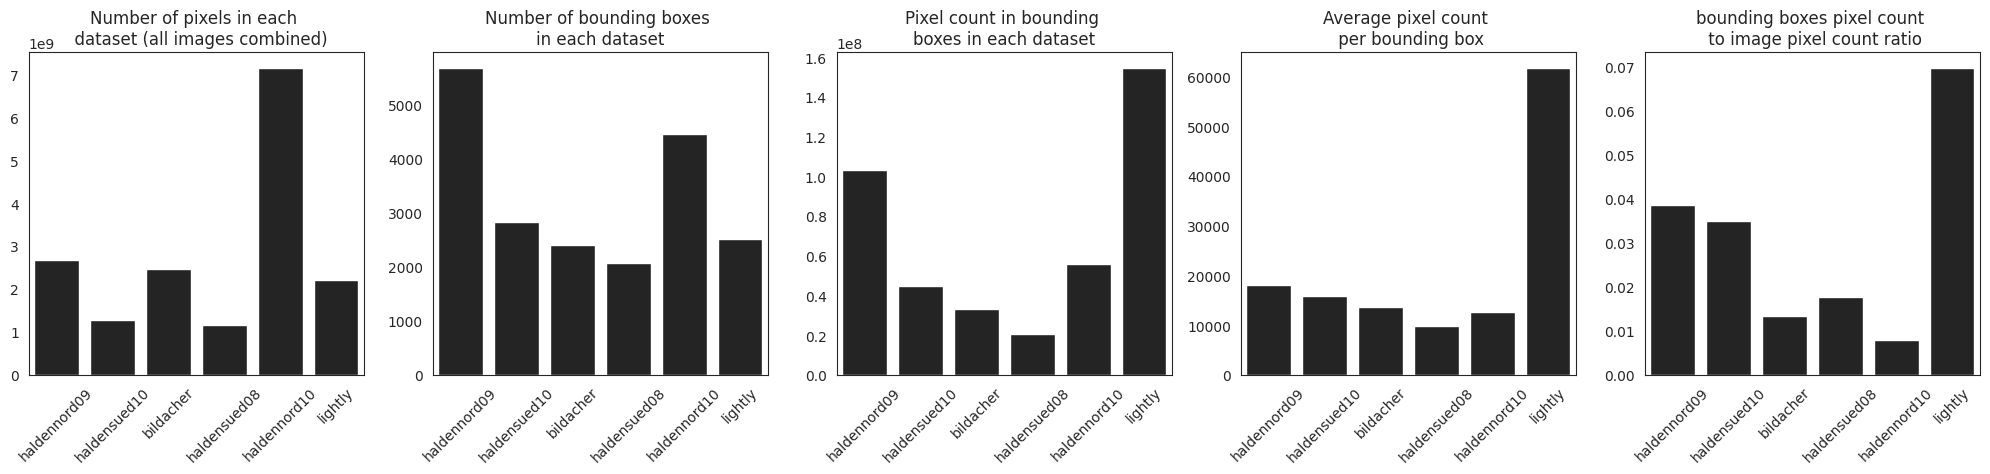

In [ ]:

plt.figure(figsize=(20, 5))

total = 5
# First plot
plt.subplot(1, total, 1)  # 2 rows, 2 cols, position 1
sns.barplot(x=datasets, y=pixel_counts_dataset)
plt.title('Number of pixels in each \n  dataset (all images combined)')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Second plot
plt.subplot(1, total, 2)  # 2 rows, 2 cols, position 2
sns.barplot(x=datasets, y=bboxes_counts)
plt.title('Number of bounding boxes \nin each dataset')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Third plot
plt.subplot(1, total, 3)  # 2 rows, 2 cols, position 3
sns.barplot(x=datasets, y=pixel_counts_bboxes)
plt.title('Pixel count in bounding \nboxes in each dataset')
plt.xticks(rotation=45)  # Tilt x-axis labels

plt.subplot(1, total, 4)  # 2 rows, 2 cols, position 3
sns.barplot(x=datasets, y=avg_pixel_count_bboxes)
plt.title('Average pixel count \n per bounding box')
plt.xticks(rotation=45)  # Tilt x-axis labels

plt.subplot(1, total, 5)  # 2 rows, 2 cols, position 3
sns.barplot(x=datasets, y=bboxes_pixels_to_image_ratio)
plt.title('bounding boxes pixel count \n to image pixel count ratio')
plt.xticks(rotation=45)  # Tilt x-axis labels

plt.tight_layout()
plt.show()

ValueError: Expected y_max for bbox [0.8076172  0.9758242  0.87890625 1.0322344  0.        ] to be in the range [0.0, 1.0], got 1.0322344303131104.

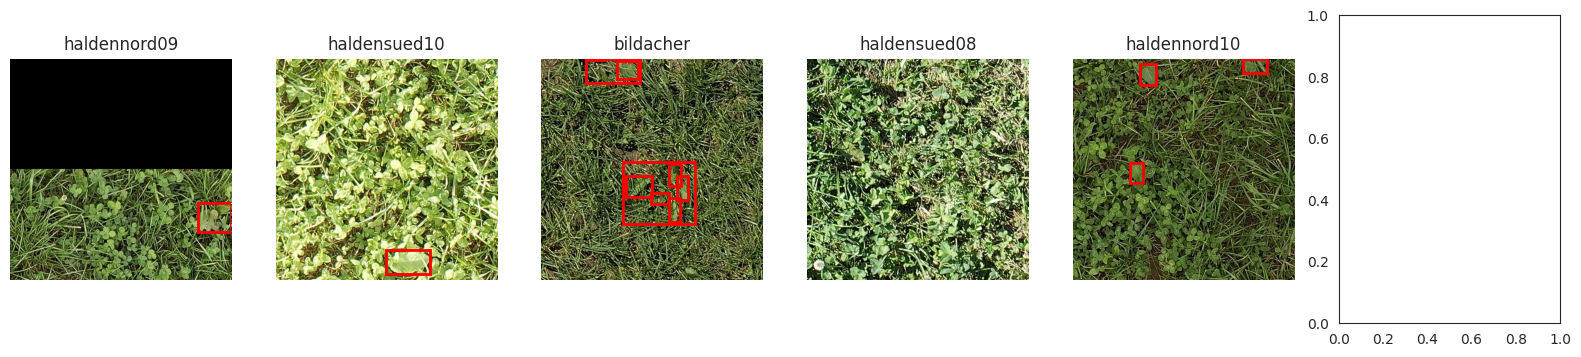

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import albumentations as A
import cv2
import json
import random
import os
import numpy as np

# Setup for visualization
fig, axes = plt.subplots(1, len(datasets), figsize=(20, 4))
transform = A.Compose([
    A.AtLeastOneBBoxRandomCrop(height=678, width=678, p=1.0)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

plot_idx = 0
for d in datasets:
    # Your existing code
    images_path = os.path.join(darwin_path, d, 'images')
    images_list = os.listdir(images_path)
    count = len(images_list)
    datasets_info[d]['n_images'] = count  
    
    pixel_count_dataset = 0
    for image in images_list:
        image_path = os.path.join(images_path, image)
        pixel_count_image = get_pixel_count_simple(image_path)
        pixel_count_dataset = pixel_count_dataset + pixel_count_image
    datasets_info[d]['pixel_count'] = pixel_count_dataset
    
    annotations_path = os.path.join(darwin_path, d, 'releases/latest/annotations/')
    dimensions = get_dataset_dimensions(annotations_path)
    datasets_info[d]['bboxes_count'] = dimensions['total_annotations']
    datasets_info[d]['widths_distribution'] = dimensions['widths']
    datasets_info[d]['areas_distribution'] = dimensions['areas']
    bboxes_pixel_count = np.sum(dimensions['areas'])
    datasets_info[d]['bboxes_pixel_count'] = bboxes_pixel_count
    
    # Visualization code
    json_files = [f for f in os.listdir(annotations_path) if f.endswith('.json')]
    random_json = random.choice(json_files)
    
    with open(os.path.join(annotations_path, random_json), 'r') as f:
        data = json.load(f)
    
    image_name = data['item']['name']
    image_path = os.path.join(images_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Prepare bboxes for albumentations (pascal_voc format: [x_min, y_min, x_max, y_max])
    bboxes = []
    class_labels = []
    for annotation in data.get('annotations', []):
        bbox = annotation['bounding_box']
        x_min = bbox['x']
        y_min = bbox['y']
        x_max = bbox['x'] + bbox['w']
        y_max = bbox['y'] + bbox['h']
        bboxes.append([x_min, y_min, x_max, y_max])
        class_labels.append(annotation.get('name', 'object'))
    
    # Apply transformation with bbox adjustment
    transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
    cropped_image = transformed['image']
    cropped_bboxes = transformed['bboxes']
    
    axes[plot_idx].imshow(cropped_image)
    axes[plot_idx].set_title(f'{d}')
    axes[plot_idx].axis('off')
    
    # Draw adjusted bounding boxes
    for bbox in cropped_bboxes:
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height,
            linewidth=2, edgecolor='red', facecolor='none'
        )
        axes[plot_idx].add_patch(rect)
    
    plot_idx += 1

plt.tight_layout()
plt.show()

In [ ]:
# Statistics for Lightly

In [ ]:
import pandas as pd
dataset_dir = Path(os.path.join(darwin_path, 'lightly', 'releases/latest/annotations/'))
json_files = list(dataset_dir.glob("*.json"))
datasets_names =[str(s).split('/')[-1].split('.')[0].split('_')[1] for s in json_files]   # get the name of the dataset
datasetscounts = pd.Series(datasets_names).value_counts()

plt.figure(figsize=(10, 20))
sns.barplot(y=datasetscounts.index, x=datasetscounts.values, order=datasetscounts.index)
plt.title('Number of images in each dataset')
plt.xlabel('Elements')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
datasetscounts.index